In [ ]:
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('El usuario subió el archivo "{name}" con longitud {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
import pandas as pd
df = pd.read_csv('SN_d_tot_V2.0-2011-2024.csv')

In [ ]:
import os
import aiohttp
import asyncio
from bs4 import BeautifulSoup
import html5lib
import urllib.request

folder = 'training_images_4'
os.makedirs(folder, exist_ok=True)

async def download_image(sn_n, df_filtrado, folder):
    if df_filtrado.empty:
        print(f"No se encontraron datos para el número de mancha solar {sn_n}")
        return

    year = df_filtrado['year'].tolist()
    month = df_filtrado['month'].tolist()
    day = df_filtrado['day'].tolist()
    position_list = 0
    prev_year = year[0]
    folder2 = folder + "/" + str(sn_n)
    os.makedirs(folder2, exist_ok=True)

    tasks = []
    for i in year:
        base_url = "https://soho.nascom.nasa.gov/data/REPROCESSING/Completed/"
        formatted_month = str(month[position_list]).zfill(2)
        formatted_day = str(day[position_list]).zfill(2)
        url = base_url + str(i) + "/hmiigr/" + str(i) + formatted_month + formatted_day + "/"
        cont = 0

        if position_list > 0 and prev_year == i:
            position_list += 1
            continue
        prev_year = i

        async with aiohttp.ClientSession() as session:
            async with session.get(url) as response:
                html = await response.text()
                soup = BeautifulSoup(html, 'html5lib')
                imagelink = soup.find_all("a")
                position_list += 1

                if imagelink:
                    imagelink_2 = imagelink[5]['href']
                    url2 = url + imagelink_2
                    destination = os.path.join(folder2, imagelink_2)
                    task = asyncio.to_thread(urllib.request.urlretrieve, url2, destination)
                    print(f'[{sn_n}] Se guardó {imagelink_2} de {i}, {formatted_month}, {formatted_day}')
                    tasks.append(task)

    await asyncio.gather(*tasks)

async def main():
    tasks = [download_image(sn_n, df[df['sn number'] == sn_n], folder) for sn_n in range(10)]
    await asyncio.gather(*tasks)

# Ejecutar el bucle de eventos en Google Colab
import nest_asyncio
nest_asyncio.apply()
await main()

No se encontraron datos para el número de mancha solar 1
[7] Se guardó 20170705_000000_Ic_flat_1k.jpg de 2017, 07, 05
[8] Se guardó 20190722_000000_Ic_flat_1k.jpg de 2019, 07, 22
[4] Se guardó 20181021_000000_Ic_flat_1k.jpg de 2018, 10, 21
[0] Se guardó 20110114_000000_Ic_flat_1k.jpg de 2011, 01, 14
[5] Se guardó 20181011_000000_Ic_flat_1k.jpg de 2018, 10, 11
[9] Se guardó 20181124_000000_Ic_flat_1k.jpg de 2018, 11, 24
[3] Se guardó 20181110_000000_Ic_flat_1k.jpg de 2018, 11, 10
[6] Se guardó 20191001_000000_Ic_flat_1k.jpg de 2019, 10, 01
[2] Se guardó 20200307_000000_Ic_flat_1k.jpg de 2020, 03, 07
[7] Se guardó 20190529_000000_Ic_flat_1k.jpg de 2019, 05, 29
[4] Se guardó 20191104_000000_Ic_flat_1k.jpg de 2019, 11, 04
[5] Se guardó 20190405_000000_Ic_flat_1k.jpg de 2019, 04, 05
[0] Se guardó 20140717_000000_Ic_flat_1k.jpg de 2014, 07, 17
[3] Se guardó 20191113_000000_Ic_flat_1k.jpg de 2019, 11, 13
[9] Se guardó 20190707_000000_Ic_flat_1k.jpg de 2019, 07, 07
[8] Se guardó 20200124_00000

# 1 sunspot por mes de 2011 a 2024

In [ ]:
import os
import aiohttp
import asyncio
from bs4 import BeautifulSoup
import html5lib
import urllib.request

folder = 'training_images_5'
os.makedirs(folder, exist_ok=True)

async def download_image(sn_n, df_filtrado, folder):
    if df_filtrado.empty:
        print(f"No se encontraron datos para el número de mancha solar {sn_n}")
        return

    year = df_filtrado['year'].tolist()
    month = df_filtrado['month'].tolist()
    day = df_filtrado['day'].tolist()
    position_list = 0
    prev_year = year[0]
    prev_month = None  # Para controlar que se descargue solo la primera imagen del mes
    folder2 = folder + "/" + str(sn_n)
    os.makedirs(folder2, exist_ok=True)

    tasks = []
    for i in year:
        # Saltar si es el mismo mes que el procesado anteriormente
        if prev_month == month[position_list]:
            position_list += 1
            continue

        base_url = "https://soho.nascom.nasa.gov/data/REPROCESSING/Completed/"
        formatted_month = str(month[position_list]).zfill(2)
        formatted_day = str(day[position_list]).zfill(2)
        url = base_url + str(i) + "/hmiigr/" + str(i) + formatted_month + formatted_day + "/"

        prev_month = month[position_list]  # Marcar el mes como procesado
        prev_year = i

        async with aiohttp.ClientSession() as session:
            async with session.get(url) as response:
                html = await response.text()
                soup = BeautifulSoup(html, 'html5lib')
                imagelink = soup.find_all("a")

                if imagelink:
                    imagelink_2 = imagelink[5]['href']  # Obtener la primera imagen
                    url2 = url + imagelink_2
                    destination = os.path.join(folder2, imagelink_2)
                    task = asyncio.to_thread(urllib.request.urlretrieve, url2, destination)
                    print(f'[{sn_n}] Se guardó {imagelink_2} de {i}, {formatted_month}, {formatted_day}')
                    tasks.append(task)

        position_list += 1  # Aumentar el índice de la posición

    await asyncio.gather(*tasks)

async def main():
    tasks = [download_image(sn_n, df[df['sn number'] == sn_n], folder) for sn_n in range(240)]
    await asyncio.gather(*tasks)

# Ejecutar el bucle de eventos en Google Colab
import nest_asyncio
nest_asyncio.apply()
await main()


No se encontraron datos para el número de mancha solar 1
No se encontraron datos para el número de mancha solar 184
No se encontraron datos para el número de mancha solar 201
No se encontraron datos para el número de mancha solar 202
No se encontraron datos para el número de mancha solar 203
No se encontraron datos para el número de mancha solar 208
No se encontraron datos para el número de mancha solar 209
No se encontraron datos para el número de mancha solar 211
No se encontraron datos para el número de mancha solar 212
No se encontraron datos para el número de mancha solar 213
No se encontraron datos para el número de mancha solar 214
No se encontraron datos para el número de mancha solar 215
No se encontraron datos para el número de mancha solar 216
No se encontraron datos para el número de mancha solar 218
No se encontraron datos para el número de mancha solar 219
No se encontraron datos para el número de mancha solar 221
No se encontraron datos para el número de mancha solar 222

IndexError: list index out of range

# Descarga un máximo de 15 imágenes con un número de sunspots de 0, 4 y 15

In [ ]:
'''
ESTE CÓDIGO ES SOLAMENTE MIENTRAS TENEMOS LAS PRUEBAS, NADA MÁS
'''

import os
import aiohttp
import asyncio
from bs4 import BeautifulSoup
import html5lib
import urllib.request

folder = 'training_images_3'
os.makedirs(folder, exist_ok=True)

async def download_image(sn_n, df_filtrado, folder, max_images=15):
    if df_filtrado.empty:
        print(f"No se encontraron datos para el número de mancha solar {sn_n}")
        return

    year = df_filtrado['year'].tolist()
    month = df_filtrado['month'].tolist()
    day = df_filtrado['day'].tolist()
    position_list = 0
    prev_year = year[0]
    folder2 = folder + "/" + str(sn_n)
    os.makedirs(folder2, exist_ok=True)

    tasks = []
    image_count = 0
    for i in year:
        if sn_n not in [0, 4, 7]:
            break

        base_url = "https://soho.nascom.nasa.gov/data/REPROCESSING/Completed/"
        formatted_month = str(month[position_list]).zfill(2)
        formatted_day = str(day[position_list]).zfill(2)
        url = base_url + str(i) + "/hmiigr/" + str(i) + formatted_month + formatted_day + "/"
        cont = 0

        if position_list > 0 and prev_year == i:
            position_list += 1
            continue
        prev_year = i

        async with aiohttp.ClientSession() as session:
            async with session.get(url) as response:
                html = await response.text()
                soup = BeautifulSoup(html, 'html5lib')
                imagelink = soup.find_all("a")
                position_list += 1

                if imagelink:
                    imagelink_2 = imagelink[5]['href']
                    url2 = url + imagelink_2
                    destination = os.path.join(folder2, imagelink_2)
                    task = asyncio.to_thread(urllib.request.urlretrieve, url2, destination)
                    print(f'[{sn_n}] Se guardó {imagelink_2} de {i}, {formatted_month}, {formatted_day}')
                    tasks.append(task)
                    image_count += 1
                    if image_count >= max_images:
                        break

    await asyncio.gather(*tasks)

async def main():
    sunspots_to_process = [0, 4, 7]
    tasks = [download_image(sn_n, df[df['sn number'] == sn_n], folder, max_images=15) for sn_n in sunspots_to_process]
    await asyncio.gather(*tasks)

# Ejecutar el bucle de eventos en Google Colab
import nest_asyncio
nest_asyncio.apply()
await main()

[121] Se guardó 20220402_000000_Ic_flat_1k.jpg de 2022, 04, 02
[10] Se guardó 20210411_000000_Ic_flat_1k.jpg de 2021, 04, 11
[124] Se guardó 20140101_000000_Ic_flat_1k.jpg de 2014, 01, 01
[166] Se guardó 20230530_000000_Ic_flat_1k.jpg de 2023, 05, 30
[143] Se guardó 20240214_000000_Ic_flat_1k.jpg de 2024, 02, 14
[139] Se guardó 20140320_000000_Ic_flat_1k.jpg de 2014, 03, 20
[102] Se guardó 20140820_000000_Ic_flat_1k.jpg de 2014, 08, 20
[153] Se guardó 20230325_000000_Ic_flat_1k.jpg de 2023, 03, 25
[62] Se guardó 20131123_000000_Ic_flat_1k.jpg de 2013, 11, 23
[37] Se guardó 20160101_000000_Ic_flat_1k.jpg de 2016, 01, 01
[33] Se guardó 20160321_000000_Ic_flat_1k.jpg de 2016, 03, 21
[165] Se guardó 20230719_000000_Ic_flat_1k.jpg de 2023, 07, 19
[16] Se guardó 20161222_000000_Ic_flat_1k.jpg de 2016, 12, 22
[57] Se guardó 20121224_000000_Ic_flat_1k.jpg de 2012, 12, 24
[46] Se guardó 20160414_000000_Ic_flat_1k.jpg de 2016, 04, 14
[86] Se guardó 20141108_000000_Ic_flat_1k.jpg de 2014, 11, 08


In [ ]:
import os

# Imprime la lista de archivos en la carpeta
print(os.listdir('/content/training_images_5'))


['182', '79', '84', '8', '2', '41', '166', '179', '88', '109', '37', '149', '93', '74', '158', '50', '63', '71', '228', '102', '17', '210', '67', '134', '108', '87', '120', '29', '126', '189', '5', '39', '13', '138', '72', '180', '129', '121', '155', '135', '220', '169', '19', '186', '124', '112', '110', '90', '89', '69', '3', '197', '55', '78', '200', '116', '175', '143', '21', '193', '77', '157', '85', '163', '58', '161', '185', '11', '207', '111', '45', '156', '83', '38', '198', '160', '147', '25', '51', '199', '49', '154', '23', '62', '205', '173', '80', '122', '4', '164', '223', '7', '146', '133', '12', '56', '95', '97', '26', '52', '70', '217', '178', '22', '9', '35', '168', '94', '159', '48', '100', '153', '57', '176', '127', '46', '172', '34', '191', '123', '130', '33', '60', '15', '68', '183', '128', '91', '10', '152', '53', '28', '162', '96', '98', '73', '196', '59', '30', '105', '64', '99', '54', '192', '82', '125', '18', '151', '188', '42', '139', '65', '103', '6', '114', '

# Preprocesamiento de imágenes

In [ ]:
# Se preprocesa la imagen a un formato que tensorflow pueda leerlas
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de datos con reescalado
datagen = ImageDataGenerator(rescale=1./255)

# Cargar las imágenes del directorio
generator = datagen.flow_from_directory(
    directory='/content/training_images_5',
    target_size=(256, 256),
    batch_size=20,
    class_mode='sparse'
)

Found 2964 images belonging to 208 classes.


In [ ]:
# Es el mismo procesado anterior, pero almacenando las imágenes en 512*512 pixeles

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de datos con reescalado
datagen = ImageDataGenerator(rescale=1./255)

# Cargar las imágenes del directorio
generator = datagen.flow_from_directory(
    directory='/content/training_images_5',
    target_size=(512, 512),
    batch_size=20,
    class_mode='sparse'
)

# Arquitectura para probar nuestros hiperparámetros, funciones de activación, etc

In [ ]:
'''
VOY PROBANDO ALGUNAS DE ESTAS
'''
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.optimizers import Adam
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Inicializar la CNN
model = Sequential()

# Paso 1 - Capa de Convolución
model.add(Conv2D(16, (3, 3), padding='same', input_shape = (256, 256, 3), activation = 'swish'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation = 'swish'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation = 'swish'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Añadir una segunda capa de convolución y pooling
model.add(Conv2D(128, (3, 3), padding='same', activation = 'swish'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', activation = 'swish'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation = 'swish'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(2048, (3, 3), padding='same', activation = 'swish'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Paso 3 - Flattening
model.add(Flatten())

# Paso 4 - Full connection
model.add(Dense(units = 32, activation = 'swish', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dropout(0.08)) # Reducir el dropout para evitar el sobreajuste
model.add(Dense(units = 1, activation = 'linear'))

# Compilar la CNN con un optimizador Adam ajustado
adam_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = adam_optimizer, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

# Ajustar el modelo a los datos de entrenamiento con un tamaño de lote adecuado
early_stopping = EarlyStopping(monitor='loss', patience=30)

#También añadimos un historial para monitorear manualmente las épocas y realizamos el entrenamiento
model_history = model.fit(generator, epochs=1000, callbacks=[early_stopping])


Epoch 1/1000
149/149 ━━━━━━━━━━━━━━━━━━━━ 57s 231ms/step - loss: 5595.1836 - mean_absolute_error: 64.3767
Epoch 2/1000
149/149 ━━━━━━━━━━━━━━━━━━━━ 70s 193ms/step - loss: 4494.4697 - mean_absolute_error: 57.2821
Epoch 3/1000
149/149 ━━━━━━━━━━━━━━━━━━━━ 41s 196ms/step - loss: 3988.2720 - mean_absolute_error: 52.8558
Epoch 4/1000
149/149 ━━━━━━━━━━━━━━━━━━━━ 33s 204ms/step - loss: 4083.8511 - mean_absolute_error: 54.3864
Epoch 5/1000
149/149 ━━━━━━━━━━━━━━━━━━━━ 38s 193ms/step - loss: 4018.9539 - mean_absolute_error: 53.2712
Epoch 6/1000
149/149 ━━━━━━━━━━━━━━━━━━━━ 41s 192ms/step - loss: 3978.7646 - mean_absolute_error: 52.3911
Epoch 7/1000
149/149 ━━━━━━━━━━━━━━━━━━━━ 31s 199ms/step - loss: 3542.5195 - mean_absolute_error: 47.7959
Epoch 8/1000
149/149 ━━━━━━━━━━━━━━━━━━━━ 32s 197ms/step - loss: 3853.9319 - mean_absolute_error: 50.6682
Epoch 9/1000
149/149 ━━━━━━━━━━━━━━━━━━━━ 30s 193ms/step - loss: 3114.1987 - mean_absolute_error: 43.2043
Epoch 10/1000
149/149 ━━━━━━━━━━━━━━━━━━━━ 42s

#Análisis de épocas
Aquí veremos cómo varía la función de pérdida a través de la iteración en cada época. Si bien ya tenemos un earlystoping, ver la variación podría ser útil para realizar modificaciones en la arquitectura de la red.

NameError: name 'model_history' is not defined

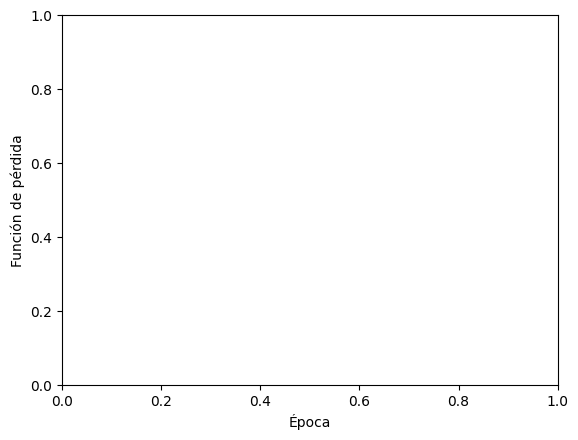

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Época")
plt.ylabel("Función de pérdida")
plt.plot(model_history.history["loss"])

# Modelo con el que se va a trabajar y modificar

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.activations import swish

# Inicializar la CNN
model = Sequential()

# Paso 1 - Capa de Convolución
model.add(Conv2D(16, (3, 3), padding='same', input_shape = (256, 256, 3), activation = 'swish'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation = 'swish'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), padding='valid', activation = 'swish'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(256, (3, 3), padding='valid', activation = 'swish'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))

model.add(Conv2D(512, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))

model.add(Conv2D(1024, (3, 3), padding='same', activation = 'swish'))
model.add(MaxPooling2D(pool_size = (1, 1)))

# Paso 3 - Flattening
model.add(Flatten())

# Paso 4 - Full connection
model.add(Dense(units = 1024, activation = 'relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.1)) # Reducir el dropout para evitar el sobreajuste
model.add(Dense(units = 1, activation = 'linear'))

# Compilar la CNN con un optimizador Adam ajustado
adam_optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer = adam_optimizer, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

# Ajustar el modelo a los datos de entrenamiento con un tamaño de lote adecuado
early_stopping = EarlyStopping(monitor='loss', patience=30)
model.fit(generator, epochs=1000, callbacks=[early_stopping])



Epoch 1/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 208ms/step - loss: 12026.5781 - mean_absolute_error: 85.1638
Epoch 2/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 189ms/step - loss: 11593.7363 - mean_absolute_error: 83.0028
Epoch 3/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 10742.1416 - mean_absolute_error: 78.2526
Epoch 4/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - loss: 4674.8867 - mean_absolute_error: 57.5554
Epoch 5/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - loss: 4889.8447 - mean_absolute_error: 59.6216
Epoch 6/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - loss: 4708.2827 - mean_absolute_error: 58.3251
Epoch 7/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - loss: 4570.3828 - mean_absolute_error: 56.5888
Epoch 8/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - loss: 4575.1064 - mean_absolute_error: 56.2177
Epoch 9/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - loss: 4709.8320 - mean_absolute_error: 58.7291
Epoch 10/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - los

KeyboardInterrupt: 

# Pruebas con sklearn y visualización del entrenamiento con Lime

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MSE: 8.265067667286113
R2 Score: -0.005210932507770716
MAE: 2.3793393770853677
MAPE: 5817601921908736.0


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

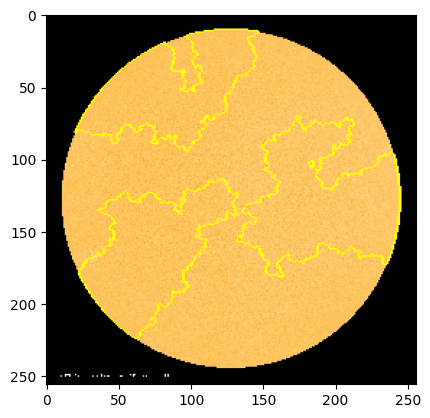

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Función para preprocesar la imagen
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0
    return img

# Predecir con el modelo
img_paths = ['/content/20160727_000000_Ic_flat_1k_sn0.jpg', '/content/20200108_000000_Ic_flat_1k_sn4.jpg', '/content/20220607_000000_Ic_flat_1k_sn7.jpg']
true_values = [0, 4, 7]  # Valores reales de sunspots
predictions = []

for path in img_paths:
    img = preprocess_image(path)
    pred = model.predict(img)
    predictions.append(pred[0])

# Calcular métricas
mse = mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)
mae = mean_absolute_error(true_values, predictions)
mape = mean_absolute_percentage_error(true_values, predictions)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

# Usar LIME para explicar una predicción
explainer = lime_image.LimeImageExplainer()

# Seleccionar una imagen para explicar
img_to_explain = preprocess_image(img_paths[0])
explanation = explainer.explain_instance(img_to_explain[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Visualizar la explicación
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.show()


# Autoentrenamiento


In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
#Para correr la siguiente celda se necesita ejecutar esta. Son funciones e información almacenada en otros bloques, pero evita tener que ejecutar el resto
#del colab
import numpy as np
from tensorflow.keras.preprocessing import image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0
    return img

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
                     (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(Conv2D(hp.Int(f'conv_{i+2}_filters', min_value=32, max_value=128, step=32),
                         (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

    return model

tuner = kt.Hyperband(build_model,
                     objective='val_mean_absolute_error',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')


#Crear x_val y y_val
img_paths = ['/content/training_images_3/0/20160603_000000_Ic_flat_1k.jpg', '/content/training_images_3/4/20200107_000000_Ic_flat_1k.jpg', '/content/training_images_3/7/20220607_000000_Ic_flat_1k.jpg']
x_val= []
for img in img_paths:
  x_val.append(preprocess_image(img))

y_val = [0, 4, 7]  # Valores reales de sunspots


#Se utiliza el generador creado en uno de los bloques anteriores

tuner.search(generator, epochs=10, validation_data=(x_val, y_val))


Reloading Tuner from my_dir/intro_to_kt/tuner0.json

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
96                |32                |conv_1_filters
3                 |3                 |num_conv_layers
32                |32                |conv_2_filters
256               |256               |dense_units
0.3               |0.4               |dropout
0.001             |0.001             |learning_rate
32                |32                |conv_3_filters
32                |32                |conv_4_filters
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 18.4088 - mean_absolute_error: 3.3561

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/eng

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/__init__.py", line 120, in get_data_adapter
    raise ValueError(f"Unrecognized data type: x={x} (of type {type(x)})")
ValueError: Unrecognized data type: x=[array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32), array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32), array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)] (of type <class 'list'>)
